In [1]:
import logging
from utils import logging as lg
lg.set_logging(logging.ERROR)


from skimage.measure import block_reduce
import numpy as np

import logging



from model import provider, heatmap_evaluation
import matplotlib.pyplot as plt
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)


In [2]:
from utils import data_provider

In [3]:
dataset = {
    'mnist': data_provider.MNISTData(dir_path='../data/mnist'),
    'fashion-mnist': data_provider.FashionMNISTData(dir_path='../data/fashion-mnist'),
    'ufi-cropped': data_provider.UFICroppedData(dir_path='../data/ufi-cropped')
}

In [4]:
def model_path(network, dataset, seq):
    return '../final-models/%s_network-%s-seq-%d' % (network, dataset, seq)

# AOPC

In [5]:
def plot_aopc(networks, dataset_name, seq):
    data = dataset[dataset_name]
    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    labels = []
    last_values = []
    for m in networks:
        path = model_path(m, dataset_name, seq)
        model_obj = provider.load(model_path(m, dataset_name, seq))
        apoc = heatmap_evaluation.aopc(model_obj, data.test2d.x[:,:,:])   
        name = provider.network_nickname(model_obj._.architecture_name)
        ax.plot(apoc, label=name)

        labels.append(name)
        last_values.append(apoc[-1])
    sorted_indices = np.argsort(-np.array(last_values))
    labels = np.array(labels)[sorted_indices]
    last_values = np.array(last_values)[sorted_indices]
    position = np.copy(last_values)
    ratio = 0.1
    for i in range(1, len(sorted_indices)):
        if position[i-1] - position[i] < ratio:
            position[i] = position[i] - ratio 
                      
    for label, value, pos in zip(labels, last_values, position):
        ax.annotate(label,
                    xy=(len(apoc)-1,value),
                    xytext=(len(apoc),pos),
                    textcoords='data',
                    arrowprops=dict(arrowstyle="->",connectionstyle="arc3")
                   )
    plt.legend()
    plt.tight_layout()
    plt.title('AOPC of %s with seq-length=%d' % (dataset_name, seq))
    plt.show()

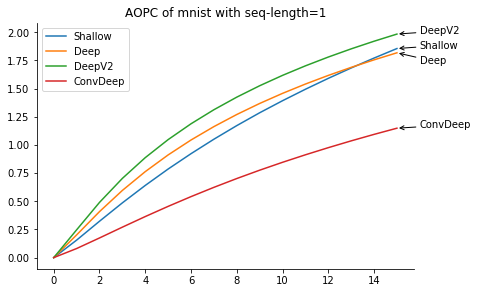

In [6]:
import imp
imp.reload(heatmap_evaluation)
plot_aopc(['s2', 's3', 'deep_4l', 'convdeep_4l'], 'mnist', 1)

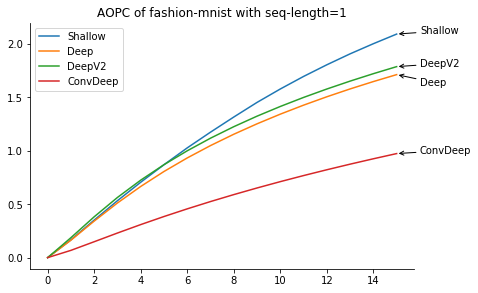

In [7]:
plot_aopc(['s2', 's3', 'deep_4l', 'convdeep_4l'], 'fashion-mnist', 1)

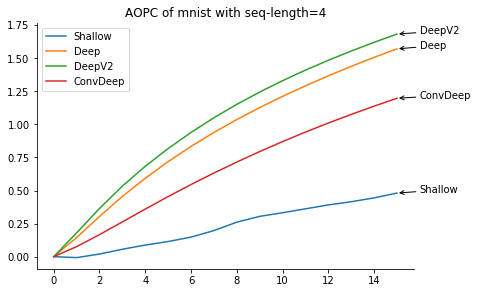

In [12]:
plot_aopc(['s2', 's3', 'deep_4l', 'convdeep_4l'], 'mnist', 4)

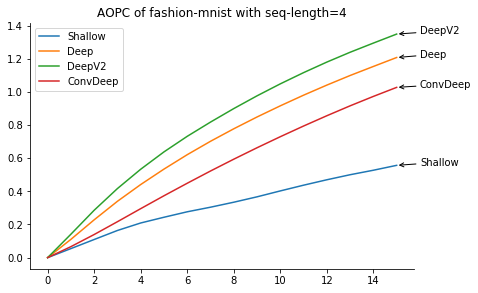

In [8]:
plot_aopc(['s2', 's3', 'deep_4l', 'convdeep_4l'], 'fashion-mnist', 4)

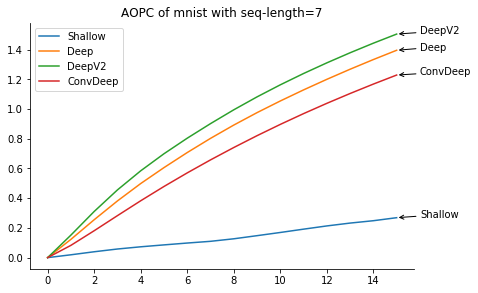

In [9]:
plot_aopc(['s2', 's3', 'deep_4l', 'convdeep_4l'], 'mnist', 7)

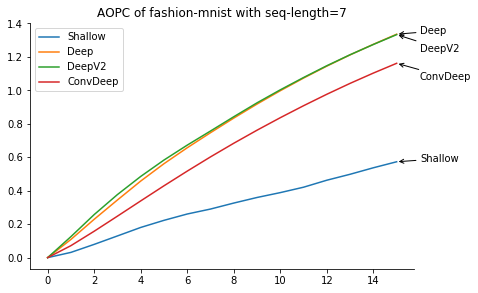

In [10]:
plot_aopc(['s2', 's3', 'deep_4l', 'convdeep_4l'], 'fashion-mnist', 7)

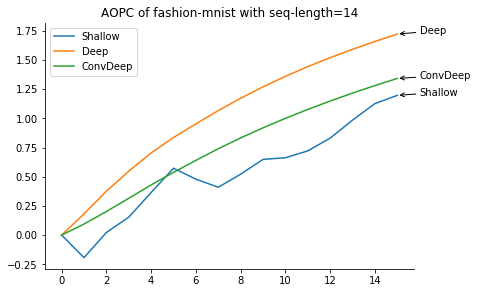

In [11]:
plot_aopc(['s2', 's3', 'convdeep_4l'], 'fashion-mnist', 14)

# Image Entropy

In [14]:
import imp
imp.reload(heatmap_evaluation)
def plot_image_entropies(networks, dataset_name, seq):
    data = dataset[dataset_name]
    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    labels = []
    last_values = []
    print("Entropy of heatmaps from %s testing dataset" % (dataset_name))
    for m in networks:
        path = model_path(m, dataset_name, seq)
        model_obj = provider.load(model_path(m, dataset_name, seq))
        entropy = heatmap_evaluation.image_entropy(model_obj, data.test2d.x[:5,:,:])   
        name = provider.network_nickname(model_obj._.architecture_name)
        print('%s : %f' % (name, entropy))
              
plot_image_entropies(['s2','s3', 'deep_4l', 'convdeep_4l'], 'mnist', 1)

Entropy of heatmaps from mnist testing dataset


/Users/heytitle/projects/heatmapping-tutorial/venv/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Shallow : 2.131083
Deep : 2.416094
DeepV2 : 2.676229
ConvDeep : 2.394079


In [15]:
plot_image_entropies(['s2','s3', 'deep_4l', 'convdeep_4l'], 'mnist', 4)

Entropy of heatmaps from mnist testing dataset


/Users/heytitle/projects/heatmapping-tutorial/venv/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Shallow : 1.552187
Deep : 1.626936
DeepV2 : 1.705432
ConvDeep : 1.892299


In [16]:
plot_image_entropies(['s2','s3', 'deep_4l', 'convdeep_4l'], 'fashion-mnist', 4)

Entropy of heatmaps from fashion-mnist testing dataset


/Users/heytitle/projects/heatmapping-tutorial/venv/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Shallow : 1.573987
Deep : 1.683961
DeepV2 : 1.673928
ConvDeep : 1.943404


In [ ]:
Entropy of heatmaps from mnist testing dataset
INFO:tensorflow:Restoring parameters from ../final-models/s2_network-mnist-seq-1/model.ckpt
2018-01-02 23:04:07,266 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s2_network-mnist-seq-1/model.ckpt
/Users/heytitle/projects/heatmapping-tutorial/venv/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
Shallow Cell : 2.131083
INFO:tensorflow:Restoring parameters from ../final-models/s3_network-mnist-seq-1/model.ckpt
2018-01-02 23:04:08,960 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s3_network-mnist-seq-1/model.ckpt
Deep Cell : 2.416094
INFO:tensorflow:Restoring parameters from ../final-models/convdeep_4l_network-mnist-seq-1/model.ckpt
2018-01-02 23:04:10,877 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/convdeep_4l_network-mnist-seq-1/model.ckpt
ConvDeep Network : 2.394079

In [182]:
from skimage import data
from skimage import img_as_uint, img_as_ubyte

In [139]:
 data.camera()

array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ..., 
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

In [146]:
_, conv_hm = provider.load(model_path('convdeep_4l', 'mnist', 1)).rel_lrp_deep_taylor(dataset['mnist'].test2d.x[:5,:,:])

INFO:tensorflow:Restoring parameters from ../final-models/convdeep_4l_network-mnist-seq-1/model.ckpt


2018-01-02 22:45:29,601 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/convdeep_4l_network-mnist-seq-1/model.ckpt


In [155]:
_, s2_hm = provider.load(model_path('s2', 'mnist', 1)).rel_lrp_deep_taylor(dataset['mnist'].test2d.x[:5,:,:])

INFO:tensorflow:Restoring parameters from ../final-models/s2_network-mnist-seq-1/model.ckpt


2018-01-02 22:50:16,164 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s2_network-mnist-seq-1/model.ckpt


In [168]:
_, s3_hm = provider.load(model_path('s3', 'mnist', 1)).rel_lrp_deep_taylor(dataset['mnist'].test2d.x[:5,:,:])

INFO:tensorflow:Restoring parameters from ../final-models/s3_network-mnist-seq-1/model.ckpt


2018-01-02 22:55:35,542 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s3_network-mnist-seq-1/model.ckpt


In [171]:
_, d4_hm = provider.load(model_path('deep_4l', 'mnist', 1)).rel_lrp_deep_taylor(dataset['mnist'].test2d.x[:5,:,:])

INFO:tensorflow:Restoring parameters from ../final-models/deep_4l_network-mnist-seq-1/model.ckpt


2018-01-02 22:56:15,507 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/deep_4l_network-mnist-seq-1/model.ckpt


/Users/heytitle/projects/heatmapping-tutorial/venv/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


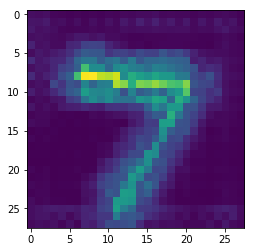

In [156]:
plt.imshow(img_as_uint(conv_hm[0,:,:]))
plt.show()

/Users/heytitle/projects/heatmapping-tutorial/venv/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


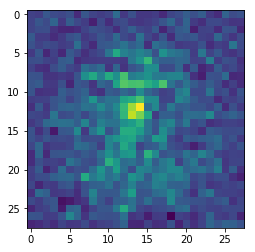

In [157]:
plt.imshow(img_as_uint(s2_hm[0,:,:]))
plt.show()

/Users/heytitle/projects/heatmapping-tutorial/venv/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


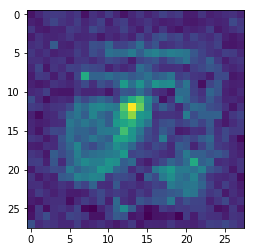

In [169]:
plt.imshow(img_as_uint(s3_hm[0,:,:]))
plt.show()

/Users/heytitle/projects/heatmapping-tutorial/venv/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


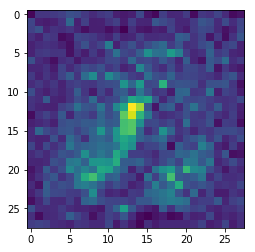

In [173]:
plt.imshow(img_as_uint(d4_hm[0,:,:]))
plt.show()

In [158]:
from skimage.filters.rank import entropy
from skimage.morphology import square, disk

In [186]:
np.mean(entropy(img_as_ubyte(s2_hm[0,:,:]), square(4)))

/Users/heytitle/projects/heatmapping-tutorial/venv/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


2.4042294022361119

In [185]:
np.mean(entropy(img_as_ubyte(s3_hm[0,:,:]), square(4)))

/Users/heytitle/projects/heatmapping-tutorial/venv/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


2.5676414910584904

In [183]:
np.mean(entropy(img_as_ubyte(conv_hm[0,:,:]), square(4)))

/Users/heytitle/projects/heatmapping-tutorial/venv/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


2.3848631979205397

In [184]:
np.mean(entropy(img_as_ubyte(d4_hm[0,:,:]), square(4)))

/Users/heytitle/projects/heatmapping-tutorial/venv/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


2.8146790316059032